# Code for AMAS project 2
### *By Niels August Davidsen*

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.integrate import quad

# Seed
np.random.seed(42)


In [4]:
plt.rcParams['figure.dpi'] = 150

rc = {"font.family" : "serif", 
      "mathtext.fontset" : "stix"}
plt.rcParams.update(rc)
plt.rcParams["font.serif"] = ["Times New Roman"] + plt.rcParams["font.serif"]

___

# Problem 1:



In [5]:
def acc_rej(N_points, f, a, b, xrange=[-1.02, 1.11], yrange=[0,2]):
    n=0
    data = []
    while n < N_points:
        x = np.random.uniform(*xrange)
        y = np.random.uniform(*yrange)
        if y < f(x, a,b):
            data.append(x)
            n+=1
    return np.array(data)

def pdf_non_normal(x, a, b):
    return 1 + x * a + b * x**2

x_min = -1.02
x_max = 1.11
a_true = 0.9
b_true = 0.55

def pdf(x, a, b):
    integral, _ = quad(pdf_non_normal, x_min, x_max, args=(a, b))
    A = 1 / integral
    return A * pdf_non_normal(x, a,b)

def llh(params, data):
    return -np.sum(np.log(pdf(data, *params)))

N_points = 807
data = acc_rej(N_points, pdf, a_true, b_true)
np.savetxt("davidsen_polynomial.txt", data)

guess = [0, 0]
res = minimize(llh, x0=guess, args=(data,), method='L-BFGS-B')
a_ml, b_ml = res.x
print(f"Maximum likelihood estimates: a={a_ml:.3f}, b={b_ml:.3f}")


Maximum likelihood estimates: a=0.771, b=0.461


In [6]:
from scipy.stats import poisson
lam_true = 3.8
Np = 513

data_poisson = poisson.rvs(lam_true, size=Np)
np.savetxt("davidsen_poisson.txt", data_poisson)   
def llh_poisson(lam, data):
    return -np.sum(np.log(poisson.pmf(data, lam)))

guess = [2]
res = minimize(llh_poisson, x0=guess, args=(data_poisson,), method='L-BFGS-B')
lam_ml = res.x[0]
print(f"Maximum likelihood estimate: lambda={lam_ml:.3f}")


Maximum likelihood estimate: lambda=3.667


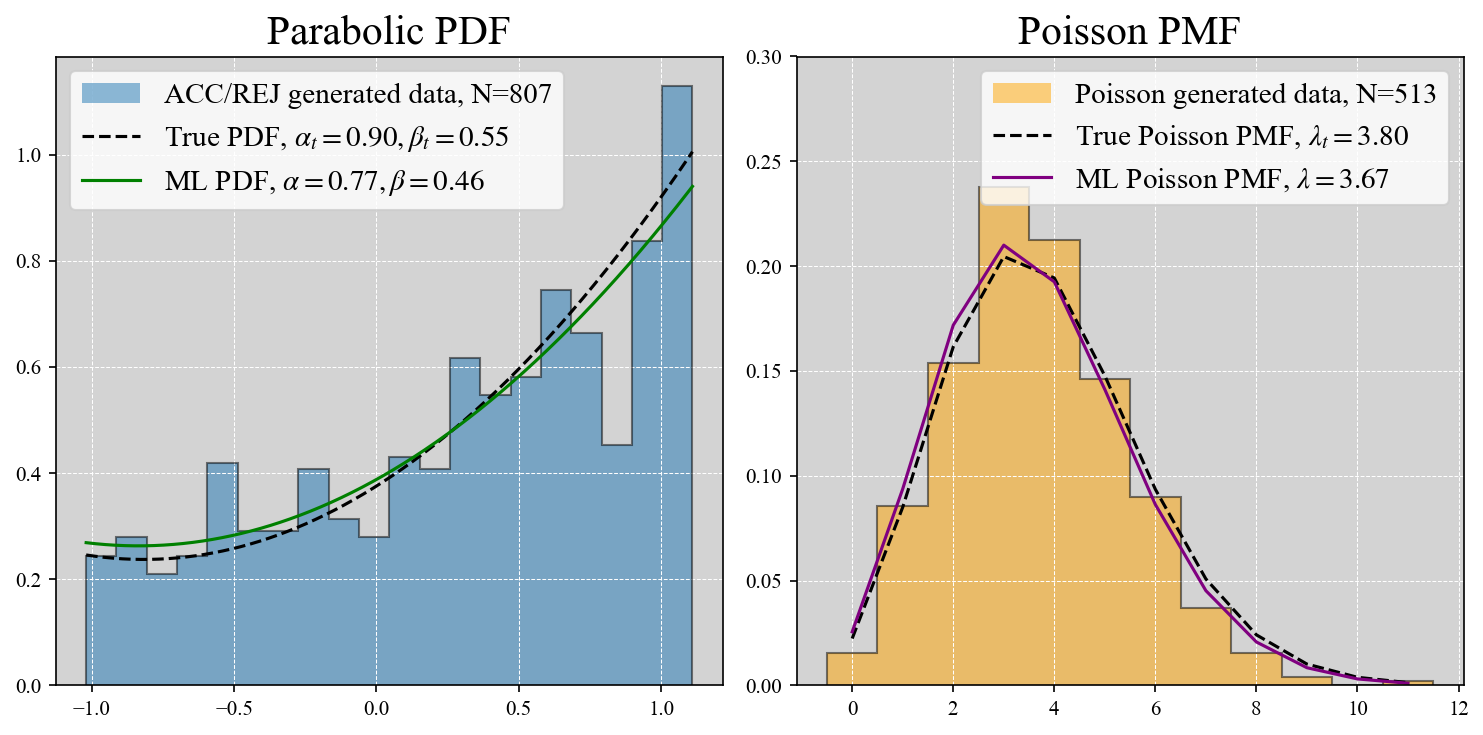

In [7]:
fig, ax = plt.subplots(1,2, figsize=(10,5), dpi=150)
hist_range = [-1.02, 1.11]
ax[0].hist(data, range=hist_range, bins=20, label=f'ACC/REJ generated data, N={len(data)}', alpha=0.5, density=True, histtype='stepfilled');
ax[0].hist(data, range=hist_range, bins=20, alpha=0.5, density=True, histtype='step', color='k');
x = np.linspace(*hist_range, 1000)

ax[0].plot(x, 
           pdf(x, a_true, b_true), 
           label=r'True PDF, $\alpha_t = {:.2f}, \beta_t = {:.2f}$'.format(a_true, b_true), 
           lw=1.5, 
           color='k', 
           ls='--')

ax[0].plot(x, 
           pdf(x, a_ml, b_ml), 
           label=r'ML PDF, $\alpha = {:.2f}, \beta = {:.2f}$'.format(a_ml, b_ml), 
           lw=1.5, color='green', 
           ls='-')
ax[0].set_title('Parabolic PDF', fontsize=20)


hist_range = [-0.5, 11.5]
ax[1].hist(data_poisson, range=hist_range, bins=12, label=f'Poisson generated data, N={len(data_poisson)}', alpha=0.5, density=True, histtype='stepfilled', color='orange');
ax[1].hist(data_poisson, range=hist_range, bins=12, alpha=0.5, density=True, histtype='step', color='k');
x = np.arange(hist_range[0] + 0.5, hist_range[1] + 0.5, 1)
ax[1].plot(x, 
           poisson.pmf(x, lam_true), 
           label=r'True Poisson PMF, $\lambda_t = {:.2f}$'.format(lam_true), 
           lw=1.5, 
           color='k', 
           ls='--')

ax[1].plot(x, poisson.pmf(x, lam_ml), 
           label=r'ML Poisson PMF, $\lambda = {:.2f}$'.format(lam_ml), 
           lw=1.5, 
           color='purple', 
           ls='-')

ax[1].set_ylim(0, 0.3)
ax[1].set_title('Poisson PMF', fontsize=20)


for a in ax:
    a.set_facecolor('lightgrey')
    a.grid(color='white', which='both', linestyle='--', lw=0.5) 
    a.legend(fontsize=14)

plt.tight_layout()


___ 

# Problem 2:



In [8]:
from matplotlib.path import Path

Text(0.01, 1.04, 'Area of Batman symbol: $A_b = \\frac{N_b}{N_s} \\times A_s$ = 0.16')

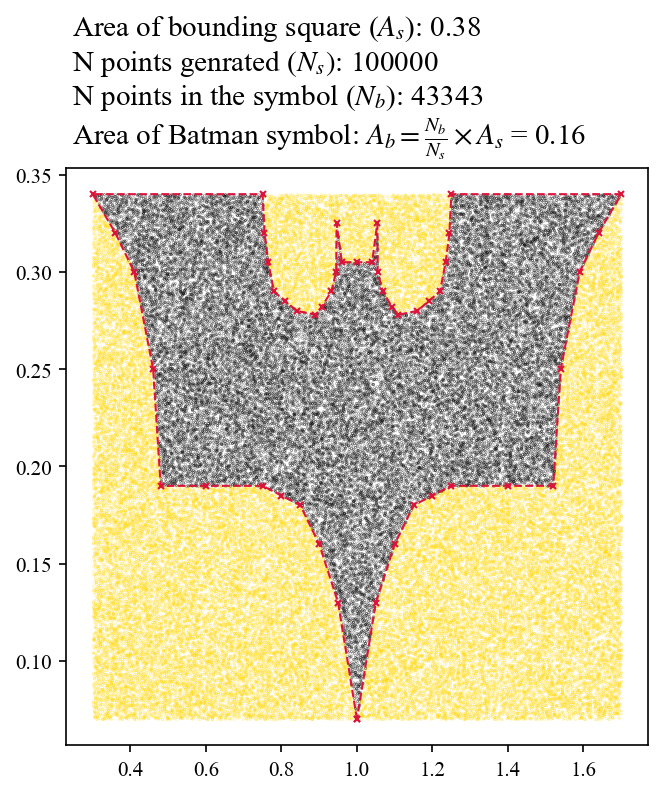

In [17]:
boundary_points = np.loadtxt("OutlineAreaSpline.txt", skiprows=1, usecols=(0,1))
x = boundary_points[:,0]
y = boundary_points[:,1]

x_min, x_max = x.min(), x.max()
y_min, y_max = y.min(), y.max()

N_samples = int(1e5)
x_samples = np.random.uniform(x_min, x_max, N_samples)
y_samples = np.random.uniform(y_min, y_max, N_samples)

path = Path(boundary_points, )
inside = path.contains_points(np.column_stack((x_samples, y_samples)))
x_inside = x_samples[inside]
y_inside = y_samples[inside]
x_outside = x_samples[~inside]
y_outside = y_samples[~inside]

area_square = (x_max - x_min) * (y_max - y_min)
area = len(x_inside) * area_square / N_samples 

b_area_str = r"Area of Batman symbol: $A_b = \frac{N_b}{N_s} \times A_s$" + f" = {area:.2f}"
fig, ax = plt.subplots(1,1, figsize=(5,5), dpi=150)
ax.plot(x_outside, y_outside, color='gold', ls='', marker='o', markersize=.1, label='Points outside the Batman symbol')
ax.plot(x_inside, y_inside, color='k', ls='', marker='o', markersize=.1, label='Points within the Batman symbol')
ax.plot(x, y, color='crimson', ls='--', marker='x', markersize=3, lw='1', label='Boundary of Batman symbol')
ax.text(0.01, 1.23, f"Area of bounding square ($A_s$): {area_square:.2f}", transform=ax.transAxes, fontsize=14)
ax.text(0.01, 1.17, f"N points genrated ($N_s)$: {N_samples}", transform=ax.transAxes, fontsize=14)
ax.text(0.01, 1.11, f"N points in the symbol ($N_b$): {len(x_inside)}", transform=ax.transAxes, fontsize=14)
ax.text(0.01, 1.04, b_area_str, transform=ax.transAxes, fontsize=14)


#ax.legend(fontsize=10, loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=1)



____ 

# Problem 3:

Suppose that there are genes which are individually ‘x' or ‘X’, and in combination determine some trait, e.g. hair color: xx is red, mixed genes (xX or Xx) are black, and XX is black. 
The population has a proportion of red-haired people equal to $p^2$ and mixed gene people equal to $2p(1-p)$, for $0<p<1$. 

Each parent gives a single gene to their offspring, with a 50:50 probability of x or X for mixed gene parents. 
We can assume a random mixture of parents within the population.

Of children that are xX what is the proportion that come 
come from parents which both have black hair?
Hint this is a conditional probability.



*My answer*

The answer must of course have a dependence of $p$, and I used Bayes theorem where the posterior is written as: "What is the probability of both parents having black hair, given a child with the xX gene combination". The notation might be a bit confusing so here is a short rundown: I have chose to use "a" for adult (p for parent was taken). A child is denoted with "c" and black and red hair is denoted with "b" and "r" repsectively. As an example, a child with black hair is denoted "c w. b".

$P(A|B) = \frac{P(B|A)P(A)}{P(B)} \Rightarrow P(\text{a w. b}| \text{c w. xX}) = \frac{P( \text{c w. xX}|\text{a w. b}) P(\text{a w. b})}{P(\text{c w. xX})}$

In words, the likelihood ($P( \text{c w. xX}|\text{a w. b})$) is the probability of getting a child with gene combination xX when both parents have black hair. The prior ($P(\text{a w. b})$) is the probability that both parents have black hair. The marginal probability ($P(\text{c w. xX})$) is the probability that a random child gets the mixed gene combination xX or Xx ($\text{xX} = \text{Xx}$)


Starting with the likekelihood. The probability of a child having the genes xX is determined by the genes of the parents. As both parents have to be black haired this is leaves us with the combinations xX and XX for parent genes. But obviously two parents with the genes XX would have 0\% chance of getting a child with the genes xX so only the combinations (xX, xX) and (XX, xX) are left and these both have 50\% chance of getting a child with genes xX.

But since the $P(\text{XX} | \text{a w. b})$ and $P(\text{Xx} | \text{a w. b})$ are non-equal, this has to be taken into account:

The probability 

$P(\text{xX} | \text{a w. b}) = \frac{P(\text{xX})}{\text{a w. b}} = \frac{2p(1-p)}{1-p^2}$  

and 

$P(\text{XX} | \text{a w. b}) = \frac{1 - P(\text{xX}) - P(\text{xx})}{1-p^2} = \frac{1 - 2p(1-p) - p^2}{1-p^2} = \frac{(1-p)^2}{1-p^2}$


So the probability of having two parents with genes (xX, xX) is given:

$P(\text{a w. xX}| \text{a. w. b}) = (\frac{2p(1-p)}{1-p^2})^2$

and the probability of having one parent with xX and one with XX is given (either parent could be XX or xX hence the factor 2):


$P(\text{a w. xX and XX}| \text{a. w. b}) = 2\frac{2p(1-p)}{1-p^2} \times \frac{(1-p)^2}{1-p^2} = 4 \frac{p(1-p)^3}{(1-p^2)^2}$






In [ ]:
p = np.linspace(0, 1, 1000)

xx = p**2
xX_Xx = 2*p*(1 - p)
XX = (1 - p)**2

black_haired = xX_Xx + XX    # Same a (1-p)^2
red_haired = xx
